#### This code uses logistic regression to classify images of coats and dresses. The method used to find the classifier is Newton's method.

Author: Bernardo Bianco Prado 

Last edited: 12/26/2021

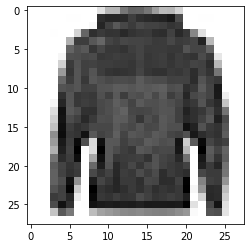

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# load data
x = np.load("fashion_mnist_images.npy")
y = np.load("fashion_mnist_labels.npy")
d, n= x.shape

i = 0 #Index of the image to be visualized 
plt.imshow(np.reshape(x[:,i], (int(np.sqrt(d)),int(np.sqrt(d)))), cmap="Greys")
plt.show()

In [4]:
'''
Perform Newton's method to the logistic regression objective function with l^2 penalty.
Method stops when relative error of the objective function between iterations is less than the specified epsilon.
'''

x = np.load("fashion_mnist_images.npy")
y = np.load("fashion_mnist_labels.npy")
d, n= x.shape

# adding bias term to x
x_bias = np.vstack([np.ones(n),x])
# stopping threshold
epsilon = np.power(10.0,-6)
# theta_{i-1}
theta_past = np.zeros(d+1)
# theta_i
theta = np.zeros(d+1)
_lambda = 1
# initial value for J(theta_{i-1})
J_past = 0
# size of training data
n_train = 5000
# initial value J(0)
J = 5000*np.log(2)
iteration = 0
# initialized difference to 1 to ensure at least one iteration
difference = 1

#print(np.shape(theta), np.shape(x[:,0]))
#print(difference > epsilon)

# Newton's method
while difference > epsilon:
    
    # print current progress
    print("J: " ,J,"| J_past: ",J_past)
    print('''\n Iteration number:''', iteration+1 , 
          '''\n Current difference in J:''', difference, "\n\n\n\n")
    
    # update J_past, theta_past
    J_past = np.copy(J)
    theta_past = np.copy(theta)
    # reset J, grad(J) and hessian(J)
    J = 0
    grad = np.zeros(d+1)
    hessian = np.zeros((d+1,d+1))
    

    #print(np.shape(theta), np.shape(x[:,0]), np.shape(y[:,0]))
    
    # iterate over each x instance
    for i in range(n_train):
        # theta dot x_i
        dot = np.dot(theta_past,x_bias[:,i])
        # exponential of y_i* (theta dot x_i)
        exp = np.exp(y[0,i]*dot)
        # compute grad(J)
        grad += -(y[0,i]/(1+exp))*x_bias[:,i]
        # compute hessian(J)
        hessian += exp*np.power(1+exp,-2)*np.outer(x_bias[:,i], x_bias[:,i])
        #print current progress
        #if i == 1000 or i == 2000 or i == 3000 or i==4000:
        #    print("Iteration ", i , "completed. \n\n")
    grad += (2*_lambda)*theta_past
    hessian += (2*_lambda)*np.identity(d+1)
    #inverse_hessian = np.linalg.inv(hessian)
        
    # compute new theta = theta_past + (hessian(J(theta_past)))^{-1} grad(J(theta_past))
    theta = np.copy(theta_past - np.matmul(np.linalg.inv(hessian),grad))
    
    
    #print(np.shape(theta), np.dot(theta,theta))
    
    # compute new J
    for i in range(n_train):
        # compute exponential that shows up in J
        expJ = np.exp(-y[0,i]*np.dot(theta,x_bias[:,i]))
        # add term from i-th instance of x
        J += np.log(1+expJ)
    J += _lambda*np.dot(theta,theta)

    # compute difference in J
    difference = np.abs(J - J_past)/np.abs(J_past)
    
            
    # count iteration
    iteration += 1
    

J:  3465.7359027997263 | J_past:  0

 Iteration number: 1 
 Current difference in J: 1 




J:  1131.3346586284379 | J_past:  3465.7359027997263

 Iteration number: 2 
 Current difference in J: 0.6735658196821889 




J:  702.6267602458145 | J_past:  1131.3346586284379

 Iteration number: 3 
 Current difference in J: 0.3789399494773395 




J:  540.1431269823811 | J_past:  702.6267602458145

 Iteration number: 4 
 Current difference in J: 0.23125170069894344 




J:  478.80442326049905 | J_past:  540.1431269823811

 Iteration number: 5 
 Current difference in J: 0.11356009297862055 




J:  460.1060710711523 | J_past:  478.80442326049905

 Iteration number: 6 
 Current difference in J: 0.03905217095117286 




J:  456.8140531081915 | J_past:  460.1060710711523

 Iteration number: 7 
 Current difference in J: 0.00715491094324579 




J:  456.639688561266 | J_past:  456.8140531081915

 Iteration number: 8 
 Current difference in J: 0.00038169698532505673 




J:  456.63896507162525 | J_p

In [8]:
# test found weight theta

# array where entry y_predited[0,i]
y_predicted = np.zeros((1000,2))
for i in range(1000):
    y_predicted[i] = [np.sign(np.dot(theta,x_bias[:,5000+i])),-y[0,i+5000]*np.dot(theta,x_bias[:,5000+i])]

# compute test error
error = np.count_nonzero(y_predicted[:,0] - y[0,5000:])
error = error/1000
print("Test error:", error*100, "%")

Test error: 3.4000000000000004 %


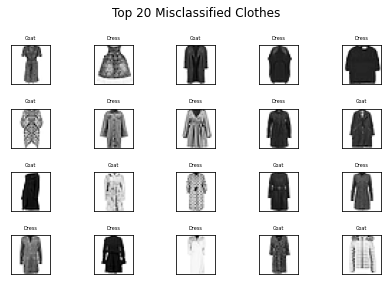

In [18]:
# find 20 most confident misclassifications

# identify misclassifications (they will be nonzero entries of z)
z = y_predicted[:,0] - y[0,5000:]
# create array with index of misclassified elements in z
n_miss = np.size(np.nonzero(z))
# index of misclassified images
index_miss = np.nonzero(z)
missclassified = np.zeros((n_miss,2))
for i in range(n_miss):
    missclassified[i,:] = [y_predicted[index_miss[0][i],1],5000+index_miss[0][i]]

# select most confident wrongly classified images

# index of most confident misclassified images
axis_order = np.argsort(missclassified,axis=0)

# array of such wrongly classified images
wrongly_confident_x = np.zeros((784,20))
# true labels of wrongly classified images
wrongly_confident_y = []
# pretty labels for the plot :)
labels = ["Dress","Coat"]

# get list of such images
for i in range(20):
    # index of i-th most confident misclassified image in misclassified array 
    find_y = axis_order[33-i,0]
    # place the misclassified image in wrongly_confident array
    wrongly_confident_x[:,i] = x[:,int(missclassified[find_y,1])]
    # label of such image
    label = y[0,int(missclassified[find_y,1])]
    # append to array of labels of misclassified images
    wrongly_confident_y.append( labels[int((label+1)/2)])
    

# display images
fig, axs = plt.subplots(4,5)
fig.suptitle("Top 20 Misclassified Clothes")
for i in range(4):
    for j in range(5):
        axs[i,j].imshow(np.reshape(wrongly_confident_x[:,i*5+j], (int(np.sqrt(d)),int(np.sqrt(d)))), cmap="Greys")
        axs[i,j].set_title(wrongly_confident_y[i*5+j], fontsize=5)
        # remove x and y labels from images
        axs[i,j].xaxis.set_visible(False)
        axs[i,j].yaxis.set_visible(False)
plt.tight_layout()
plt.savefig('missclassified.pdf')
plt.show()